
# Multiple Linear Regression 
is typically done when you have multiple correlated features (independent variables) and a single output feature (dependent variable).

However, if you have multiple output features, you would generally use a different approach, like Multivariate Linear Regression, which can handle multiple dependent variables.

## So to summarize:

### Multiple Linear Regression: 
Multiple correlated features → Single output feature.
### Multivariate Linear Regression: 
Multiple correlated features → Multiple output features.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
# Load the Iris dataset
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Select features and drop the 'species' column
X = iris.drop(columns=['species'])
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# Select only the 'species' column for the target variable
y = iris[['species']]
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


## LabelEncoder()
### Reasons for Encoding the species Feature:

We encoded the species feature to convert it from its original categorical (string) format into numeric values, which are required by machine learning models to perform computations. Without encoding, the model wouldn't be able to process the string labels.

### Label Encoding:

In this context, Label Encoding is used to convert the species feature into numeric values. For example:

'setosa' → 0

'versicolor' → 1

'virginica' → 2

This conversion allows the model to work with the target variable in numeric form.

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

C:\Users\bhosa\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Split the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


# Display the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Display the scaled data
print("Scaled X_train:\n", X_train_scaled[:5])  # Show first 5 rows
print("Scaled X_test:\n", X_test_scaled[:5])    # Show first 5 rows

Scaled X_train:
 [[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]]
Scaled X_test:
 [[ 0.35451684 -0.58505976  0.55777524  0.02224751]
 [-0.13307079  1.65083742 -1.16139502 -1.17911778]
 [ 2.30486738 -1.0322392   1.8185001   1.49058286]
 [ 0.23261993 -0.36147005  0.44316389  0.4227026 ]
 [ 1.2077952  -0.58505976  0.61508092  0.28921757]]


# Checking correlaation of input features within themselves

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


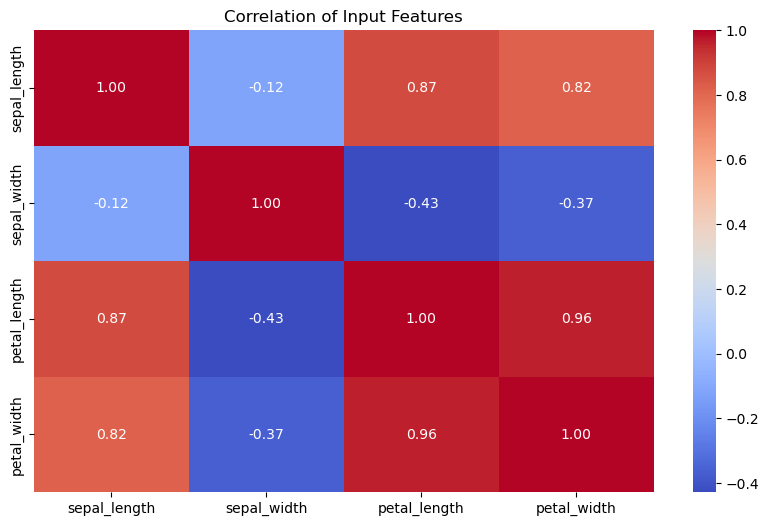

In [25]:
# Calculate the correlation matrix directly on X
## Checking the correlation of input features with each other

correlation_matrix = X.corr()
print(correlation_matrix)
# Heatmap for input features correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Input Features')
plt.show()

## Outcomes of correlation of input features with each other :-

### Strong Positive Correlations:

#### Petal Length and Petal Width: 
The correlation coefficient is approximately 0.96, indicating a very strong positive relationship. This means that as the petal length increases, the petal width tends to increase as well.
Petal Length and Sepal Length: The correlation coefficient is approximately 0.87, which is also a strong positive relationship. Longer petals are associated with longer sepals.

#### Petal Width and Sepal Length: 

The correlation coefficient is approximately 0.82, suggesting a strong positive relationship as well.

### Moderate to Weak Negative Correlations:

#### Sepal Width and Petal Length: 

The correlation coefficient is approximately -0.43, indicating a moderate negative relationship. As the petal length increases, the sepal width tends to decrease, albeit not very strongly.
#### Sepal Width and Petal Width: 

The correlation coefficient is approximately -0.37, which is also a weak to moderate negative relationship.

### Weak Correlations:

#### Sepal Length and Sepal Width: 

The correlation coefficient is approximately -0.12, indicating a very weak negative correlation. This suggests that there is little to no linear relationship between these two features.

### Summary:

The strongest relationships are between the petal features, which suggests that these measurements are closely related in the context of Iris flower classification.
The weak correlations between sepal width and the other features indicate that sepal width may not be a good predictor for petal dimensions.

# Case 1: When Model is trained on dataset having all the input features 

In [11]:

# Create and train the Multiple Linear Regression model
## Train the model with all the input features, 
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Display model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 0.03711379440797691
R² Score: 0.9468960016420044
              Coefficient
sepal_length    -0.095437
sepal_width     -0.026736
petal_length     0.444832
petal_width      0.410230


# Checking Correlation of Input features with the output features 

                 sepal_length  sepal_width  petal_length  petal_width  \
sepal_length         1.000000    -0.106926      0.862175     0.801480   
sepal_width         -0.106926     1.000000     -0.432089    -0.369509   
petal_length         0.862175    -0.432089      1.000000     0.962577   
petal_width          0.801480    -0.369509      0.962577     1.000000   
species_encoded      0.763847    -0.444109      0.947794     0.951276   

                 species_encoded  
sepal_length            0.763847  
sepal_width            -0.444109  
petal_length            0.947794  
petal_width             0.951276  
species_encoded         1.000000  


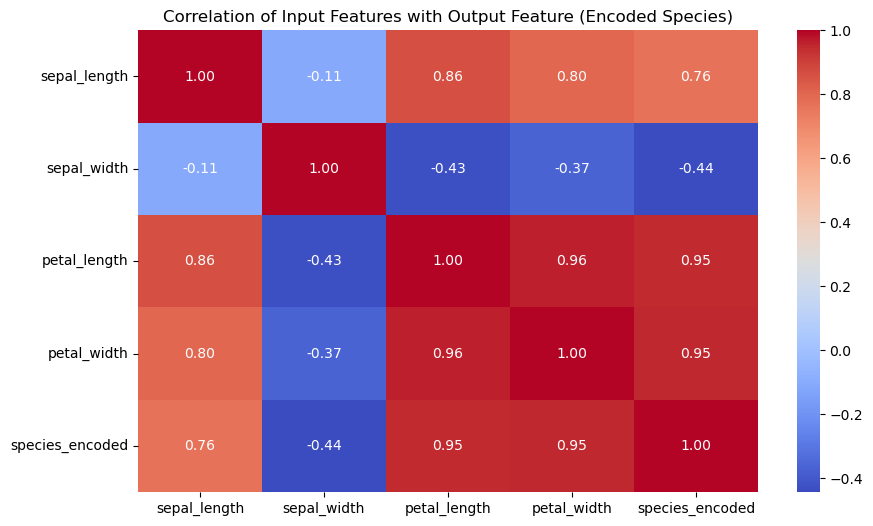

In [15]:
# Combine the scaled input features (X_train_scaled) and the target variable (y_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)  # Convert to DataFrame for correlation
combined_data = X_train_scaled_df.copy()
combined_data['species_encoded'] = y_train  # Add encoded species (target variable)

# Calculate the correlation matrix for all input features and the target variable
correlation_matrix = combined_data.corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the heatmap for correlation of input features with the output feature (species_encoded)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Input Features with Output Feature (Encoded Species)')
plt.show()

# Case 2 : When Model is trained on dataset excluding the input features which weak Correlation with output feature

In [42]:
#Check the Accuray when features having a weak correlation with the output features are not included while training the model
## Train the model with all the input features which have only strong correlation with the out[ut feature
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Drop Sepal Width, as it has a weaker and negative correlation with species
X_train_selected = X_train.drop(columns=['sepal_width'])
X_test_selected = X_test.drop(columns=['sepal_width'])

# Step 2: Initialize and train the Multi Linear Regression model
model = LinearRegression()

# Fit the model on the selected features in the training set
model.fit(X_train_selected, y_train)

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Step 4: Calculate R² Score and Mean Squared Error (MSE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Display the results
print("R² Score:", r2)
print("Mean Squared Error (MSE):", mse)


R² Score: 0.9477875302132268
Mean Squared Error (MSE): 0.03649071499542256


#### Based on the results for the R² score and Mean Squared Error (MSE), we can make the following observations:

### Case 1: Dropping Features with Weaker and Negative Correlation (sepal_width dropped)
R² Score: 0.9478
MSE: 0.0365


### Case 2: Using All Input Features (No Features Dropped)
R² Score: 0.9469

MSE: 0.0371

### Conclusions:
#### Model Performance:

The R² score (which measures how well the input features explain the variance in the target variable) is slightly higher when dropping the sepal_width feature (0.9478 vs. 0.9469). This suggests that removing the weaker and negatively correlated feature (sepal_width) improved the model's ability to explain the variance in the target variable, albeit marginally.

#### Prediction Error:
The MSE (which measures the average squared difference between actual and predicted values) is slightly lower when sepal_width is dropped (0.0365 vs. 0.0371). This indicates that the model makes slightly better predictions (less error) without the weaker feature.
Impact of Dropping Weaker Features:

Dropping a feature with weaker and negative correlation (sepal_width) has a minimal but positive impact on the model's performance. The improvement in R² and reduction in MSE are small but suggest that removing features that don't contribute much to prediction can help make the model simpler and slightly more accurate.

### Conclusion Summary:
The model performs slightly better when the weaker and negatively correlated feature (sepal_width) is dropped. This shows that in some cases, removing less relevant features can lead to a small performance boost without losing predictive power. However, the difference is not very large, meaning both models perform quite similarly.